#Data Loading and Exploration:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
pd.pandas.set_option('display.max_columns', None)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
from prettytable import PrettyTable

###Loading the employee performance dataset using Pandas.

In [2]:
df=pd.read_excel("/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [3]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [4]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

## Manual Encoding : The following are categorical columns. Hence,have been encoded

In [6]:
df.Gender.value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [7]:
df.Gender=df.Gender.map({'Male':1,'Female':0})

In [8]:
df.MaritalStatus.value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

In [9]:
df.MaritalStatus=df.MaritalStatus.map({'Married':2, 'Single':1,'Divorced':0})

In [10]:
df.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [11]:
df.EmpDepartment=df.EmpDepartment.map({'Sales':5,'Development':4,'Research & Development':3,'Human Resources':2,'Finance':1,'Data Science':0})

In [12]:
df.EmpJobRole.value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

In [13]:
df.EmpJobRole=df.EmpJobRole.map({'Sales Executive':18, 'Developer':17, 'Manager R&D':16, 'Research Scientist':15, 'Sales Representative':14, 'Laboratory Technician':13, 'Senior Developer':12, 'Manager':11, 'Finance Manager':10, 'Human Resources':9, 'Technical Lead':8, 'Manufacturing Director':7, 'Healthcare Representative':6, 'Data Scientist':5, 'Research Director':4, 'Business Analyst':3, 'Senior Manager R&D':2, 'Delivery Manager':1, 'Technical Architect':0})

In [14]:
df.BusinessTravelFrequency.value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

In [15]:
df.BusinessTravelFrequency=df.BusinessTravelFrequency.map({'Travel_Rarely':2, 'Travel_Frequently':1,'Non-Travel':0})

In [16]:
df.Attrition.value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

In [17]:
df.Attrition=df.Attrition.map({'No':1,'Yes':0})

In [18]:
df.OverTime.value_counts()

No     847
Yes    353
Name: OverTime, dtype: int64

In [19]:
df.OverTime=df.OverTime.map({'No':1,'Yes':0})

In [20]:
df.EducationBackground.value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

In [21]:
df.EducationBackground=df.EducationBackground.map({'Life Sciences':5,'Medical':4,'Marketing':3,'Technical Degree':2,'Other':1,'Human Resources':0})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   int64 
 3   EducationBackground           1200 non-null   int64 
 4   MaritalStatus                 1200 non-null   int64 
 5   EmpDepartment                 1200 non-null   int64 
 6   EmpJobRole                    1200 non-null   int64 
 7   BusinessTravelFrequency       1200 non-null   int64 
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

#Data Scaling : MinMax Scaler

In [23]:
# Dropping the first columns as it is of no use for analysis.
df.drop(['EmpNumber'],inplace=True,axis=1)

X=df.drop("PerformanceRating",axis=1)
y=df.PerformanceRating

In [24]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dl=['Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
        'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime'
       , 'EmpRelationshipSatisfaction',
        'TrainingTimesLastYear',
       'EmpWorkLifeBalance',
       'ExperienceYearsInCurrentRole','YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating']
data1=sc.fit_transform(df.drop(dl,axis=1))

In [25]:
data2=pd.DataFrame(data1,columns=['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','ExperienceYearsAtThisCompany'])

In [26]:
con_data=df[['Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
        'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime'
       , 'EmpRelationshipSatisfaction',
        'TrainingTimesLastYear',
       'EmpWorkLifeBalance',
       'ExperienceYearsInCurrentRole','YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating']]

In [27]:
df1=pd.concat([data2,con_data],axis=1)

#Feature selection and Correlation

In [28]:
df1.corr()

,Age,DistanceFromHome,EmpHourlyRate,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,ExperienceYearsAtThisCompany,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,0.020937,0.062867,-0.006105,0.680886,0.318852,-0.040107,0.049544,0.028983,-0.042295,-0.088325,0.040579,0.207313,0.013814,0.027216,0.509139,-0.002436,0.284408,-0.051910,0.049749,-0.016053,-0.019563,0.217163,0.228199,0.205098,0.189317,-0.040164
DistanceFromHome,0.020937,1.000000,0.013730,0.044974,0.027306,0.021908,-0.001507,-0.003118,0.015542,-0.035802,-0.002498,-0.020935,0.045856,-0.017719,0.003231,0.017270,-0.003036,-0.021411,-0.024940,-0.009509,-0.032082,-0.044788,0.019898,0.013246,0.017860,-0.063248,-0.046142
EmpHourlyRate,0.062867,0.013730,1.000000,-0.015934,0.026034,-0.000399,0.002218,0.048646,0.010802,-0.013530,0.022010,0.025400,0.014095,-0.049501,0.054741,-0.018606,-0.066417,0.040484,0.032636,0.008783,-0.024160,0.016189,-0.011871,-0.010000,-0.004576,0.026313,-0.043116
EmpLastSalaryHikePercent,-0.006105,0.044974,-0.015934,1.000000,-0.005933,-0.019830,-0.005319,0.012867,0.010378,-0.023807,-0.006769,-0.041946,0.002358,-0.047271,-0.001742,-0.020975,0.031847,-0.011788,0.000778,-0.042892,-0.013439,-0.017001,-0.004957,-0.015911,-0.007666,0.009448,0.333722
TotalWorkExperienceInYears,0.680886,0.027306,0.026034,-0.005933,1.000000,0.633555,-0.061055,0.028291,0.000622,-0.022333,-0.122822,0.042736,0.151062,-0.012894,-0.028851,0.784229,-0.026824,0.221505,-0.044233,0.018089,-0.022113,0.015495,0.460700,0.412781,0.460783,0.185226,-0.068141
ExperienceYearsAtThisCompany,0.318852,0.021908,-0.000399,-0.019830,0.633555,1.000000,-0.030392,0.013211,-0.001639,0.026455,-0.036191,-0.015029,0.076332,-0.000561,-0.039720,0.540377,0.001807,-0.129797,-0.004295,0.015612,0.008564,0.023479,0.764102,0.620230,0.759258,0.142456,-0.111645
Gender,-0.040107,-0.001507,0.002218,-0.005319,-0.061055,-0.030392,1.000000,-0.021775,-0.013286,-0.024570,0.021370,-0.043608,-0.022960,0.000033,0.010949,-0.050685,0.024680,-0.036675,0.038410,0.030707,-0.057654,0.015793,-0.031823,-0.021575,-0.036643,-0.035758,-0.001780
EducationBackground,0.049544,-0.003118,0.048646,0.012867,0.028291,0.013211,-0.021775,1.000000,-0.012716,0.024661,-0.001630,-0.011023,-0.038661,-0.045680,0.026778,0.020433,0.063059,0.019476,0.019592,-0.007259,0.004561,-0.030417,0.002906,0.020661,-0.004190,0.068427,-0.010804
MaritalStatus,0.028983,0.015542,0.010802,0.010378,0.000622,-0.001639,-0.013286,-0.012716,1.000000,0.018313,0.024552,0.087524,0.003130,-0.042945,0.004670,0.006755,0.028628,-0.047466,0.021658,-0.052917,-0.020050,-0.002060,0.024599,0.016567,-0.006072,0.028260,-0.039682
EmpDepartment,-0.042295,-0.035802,-0.013530,-0.023807,-0.022333,0.026455,-0.024570,0.024661,0.018313,1.000000,0.526137,-0.004787,-0.006735,-0.047219,-0.042514,0.076914,0.032903,-0.006743,-0.040541,0.025467,0.011192,0.030791,0.049500,0.042872,0.021713,-0.077275,-0.005205


<Axes: >

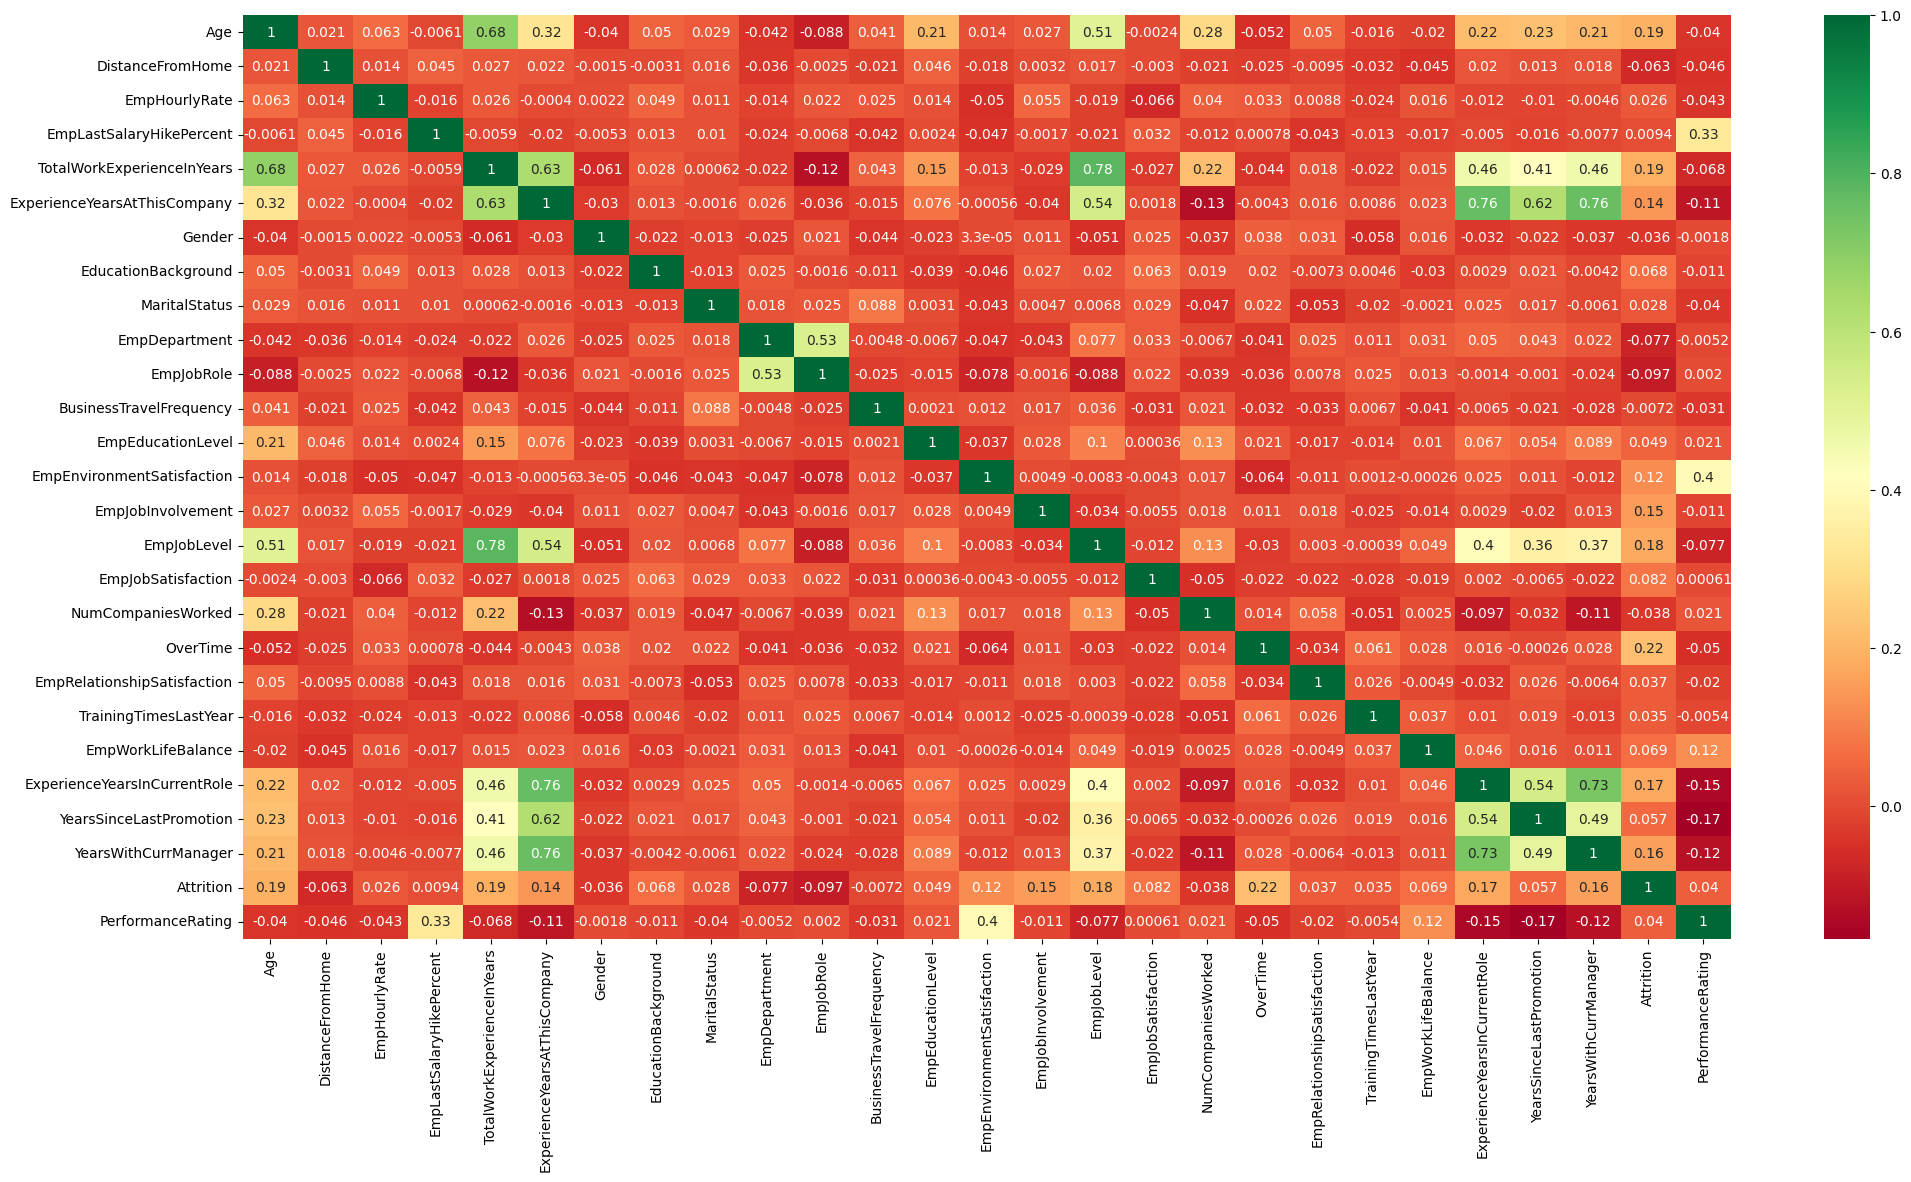

In [29]:
plt.figure(figsize=(24,12))
sns.heatmap(df1.corr(),annot=True,cmap = "RdYlGn")

#Model Building

In [30]:
#Train test split- The dataset is split into training and testing sets using the train_test_split function from scikit-learn.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((960, 26), (240, 26), (960,), (240,))

##Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
LogisticRegression()

# Predicting the model
y_predict_lr = model_lr.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report# to check model performance
# Model Evaluation - Accuracy score, classification report, and confusion matrix are printed to evaluate the Logistic Regression model.
print(accuracy_score(y_test,y_predict_lr))
print(classification_report(y_test,y_predict_lr))

0.7875
              precision    recall  f1-score   support

           2       0.60      0.39      0.48        38
           3       0.83      0.90      0.87       179
           4       0.59      0.57      0.58        23

    accuracy                           0.79       240
   macro avg       0.68      0.62      0.64       240
weighted avg       0.77      0.79      0.78       240



In [33]:
aclr=(round((accuracy_score(y_test,y_predict_lr))*100))/100
print(aclr)

0.79


##Support Vector Machines

In [34]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_train, y_train)

SVC()

In [35]:
y_pred2=svclassifier.predict(X_test)

In [36]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00        38
           3       0.75      1.00      0.85       179
           4       0.00      0.00      0.00        23

    accuracy                           0.75       240
   macro avg       0.25      0.33      0.28       240
weighted avg       0.56      0.75      0.64       240



In [37]:
acsvm=(round((accuracy_score(y_test,y_pred2))*100))/100
print(acsvm)

0.75


##Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree
dt.fit(X_train,y_train)#training the model
y_hat=dt.predict(X_test)#prediction

In [39]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
test_acc=accuracy_score(y_test,y_hat)#testing accuracy
test_acc

0.8666666666666667

In [40]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.81      0.66      0.72        38
           3       0.91      0.92      0.91       179
           4       0.67      0.78      0.72        23

    accuracy                           0.87       240
   macro avg       0.79      0.79      0.79       240
weighted avg       0.87      0.87      0.87       240



In [41]:
acdt=(round((accuracy_score(y_test,y_hat))*100))/100
print(acdt)

0.87


##Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred1 = rf_model.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.9375


In [44]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           2       0.92      0.89      0.91        38
           3       0.95      0.97      0.96       179
           4       0.86      0.78      0.82        23

    accuracy                           0.94       240
   macro avg       0.91      0.88      0.89       240
weighted avg       0.94      0.94      0.94       240



In [45]:
acrf=(round((accuracy_score(y_test,y_pred1))*100))/100
print(acrf)

0.94


##Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report# to check model performance
accu_scor=accuracy_score(y_test,y_gbm)
accu_scor

0.9458333333333333

In [48]:
print(classification_report(y_test,y_gbm))

              precision    recall  f1-score   support

           2       0.92      0.89      0.91        38
           3       0.96      0.98      0.97       179
           4       0.90      0.78      0.84        23

    accuracy                           0.95       240
   macro avg       0.93      0.88      0.90       240
weighted avg       0.94      0.95      0.94       240



In [49]:
acgb=(round((accuracy_score(y_test,y_gbm))*100))/100
print(acgb)

0.95


#Model Performance Comparison

In [50]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Model", "Accuracy"]
model_data = [
     ["Logistic Regression",(round((aclr)*100))/100],
    ["Support Vector Machine",(round((acsvm)*100))/100],
     ["Decision Tree",(round((acdt)*100))/100],
    ["Random Forest",(round((acrf)*100))/100],
    ["Gradient Boosting",(round((acgb)*100))/100],]

for row in model_data:
    table.add_row(row)

In [51]:
print(table)

+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
|  Logistic Regression   |   0.79   |
| Support Vector Machine |   0.75   |
|     Decision Tree      |   0.87   |
|     Random Forest      |   0.94   |
|   Gradient Boosting    |   0.95   |
+------------------------+----------+


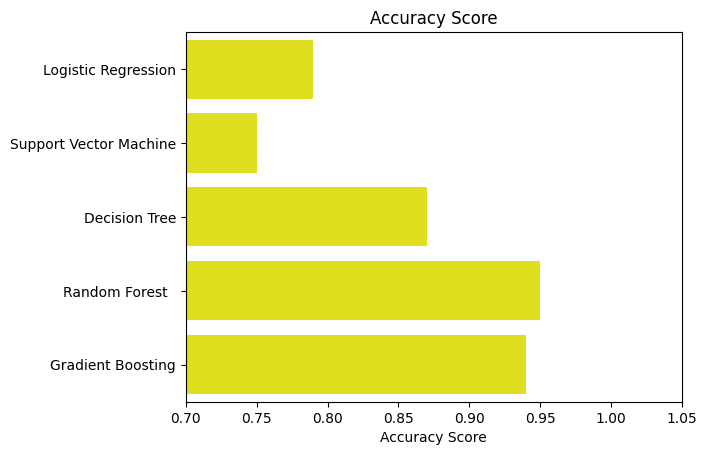

In [53]:
#A bar plot is created to compare the accuracy scores of different models.

Accuracy_Score = [aclr,acsvm,acdt,acgb,acrf]
Models = ['Logistic Regression', 'Support Vector Machine' , 'Decision Tree', 'Random Forest  ','Gradient Boosting']
sns.barplot(x=Accuracy_Score, y=Models, color="Yellow")
plt.xlim(0.7, max(Accuracy_Score) + 0.1)
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score')
plt.show()